# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

rcParams ['figure.figsize'] = 10, 7

# Loading Dataset

In [2]:
dataset = pd.read_csv ('D://Datasets//Automobile_data.csv')
display (dataset.head (2))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


# EDA, Data Visualization

In [3]:
dataset.replace ('?', 0, inplace=True)

In [4]:
print (dataset.shape )

(205, 26)


In [5]:
print (dataset.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Label Encoding & Explicit Type casting

In [6]:
def con_type (dataset, cols_name, type_ = 'float64'):
    try:
        if (type (cols_name) == type ([])) and (type_ == 'float64'):
            if len (cols_name) != 0:
                for col_name in cols_name:
                    dataset [col_name] = dataset [col_name].astype (type_)
            else:
                print ('ZeroLenError: No elements in the list')
        else:
            print ('NMTError: Not my type error!!!')
    except:
        print ('Error occured')

In [7]:
con_type (dataset, ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses'], 'float64')

In [8]:
le = LabelEncoder ()

In [9]:
def label_encode_it (dataset, cols_name):
    if type (cols_name) == type ([]):
        for col_name in cols_name:
            if dataset [col_name].dtypes == 'object':
                le.fit (dataset [col_name])
                dataset [col_name] =(le.transform (dataset [col_name]))
            else:
                print ('NMTError: Not my type !!!')
    else:
        print ('UnexpectedTypeError: Expected {} but got {}'.format (type ([]), type (cols_name)))

In [10]:
label_encode_it (dataset, ['fuel-system', 'num-of-cylinders', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make'])

In [11]:
dataset ['num-of-doors'].replace (dataset ['num-of-doors'].unique (), [2, 4, 0], inplace=True)

In [12]:
display (dataset.describe ())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,12.195122,0.902439,0.180488,3.092683,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.264780,3.191902,10.142537,103.239024,5075.365854,25.219512,30.751220,12949.429268
std,1.245307,58.282073,6.274831,0.297446,0.385535,1.036678,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.535268,0.549625,3.972040,40.832470,694.650771,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,8.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,12.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,19.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
dataset.isna ().sum ().sum ()

0

In [14]:
dataset.duplicated ().sum ()

0

In [15]:
dataset.head (2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,0.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [16]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int32  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int32  
 15  num-of-cylinders   205 non-null    int32  
 16  engine-size        205 non

In [17]:
print (dataset.dtypes.values)

[dtype('int64') dtype('float64') dtype('int32') dtype('int32')
 dtype('int32') dtype('int64') dtype('int32') dtype('int32')
 dtype('int32') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('int64') dtype('int32') dtype('int32')
 dtype('int64') dtype('int32') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('int64')
 dtype('int64') dtype('float64')]


In [18]:
corr = dataset.corr ()
display (corr)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.196837,-0.118794,0.194311,-0.059866,-0.625944,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.277962,-0.206945,-0.178515,0.065759,0.178287,-0.035823,0.034606,-0.071461
normalized-losses,0.196837,1.000000,0.040185,0.089637,-0.046293,-0.107451,-0.086214,-0.044944,-0.204579,-0.196317,...,-0.301343,-0.159433,-0.213760,-0.141477,-0.068856,-0.182771,0.240000,0.150868,0.171033,-0.237939
make,-0.118794,0.040185,1.000000,-0.113191,0.054265,0.182585,0.089494,-0.004317,0.054608,0.078505,...,-0.070918,0.146624,0.208630,-0.037063,0.138828,-0.067107,-0.193786,0.053642,0.050022,-0.130730
fuel-type,0.194311,0.089637,-0.113191,1.000000,-0.401397,-0.129503,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.067562,-0.176066,-0.984356,0.151666,0.303845,-0.255963,-0.191392,-0.117852
aspiration,-0.059866,-0.046293,0.054265,-0.401397,1.000000,0.019265,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.164689,0.181588,0.295541,0.244176,-0.092224,-0.202362,-0.254416,0.166891
num-of-doors,-0.625944,-0.107451,0.182585,-0.129503,0.019265,1.000000,0.640256,-0.078301,-0.128765,0.437162,...,0.028701,-0.020715,0.189658,0.109380,0.116988,-0.096990,-0.148952,-0.041322,-0.064732,0.074017
body-style,-0.596135,-0.086214,0.089494,-0.147853,0.063028,0.640256,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.092612,0.074336,0.136243,-0.158764,-0.107575,0.031697,-0.007170,-0.066508
drive-wheels,-0.041671,-0.044944,-0.004317,-0.132257,0.066465,-0.078301,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.096157,-0.099703,0.127479,0.515020,0.015232,-0.449581,-0.452220,0.580688
engine-location,0.212471,-0.204579,0.054608,0.040070,-0.057191,-0.128765,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.108460,-0.064881,-0.019762,0.310438,0.145025,-0.153487,-0.102026,0.326294
wheel-base,-0.531954,-0.196317,0.078505,-0.308346,0.257611,0.437162,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.317327,0.158493,0.249786,0.351681,-0.215763,-0.470414,-0.544082,0.578804


In [19]:
corr_T = np.transpose (corr.iloc [:, -1:])
corr_val = corr_T.values
print (corr_val)

[[-0.07146117 -0.23793944 -0.1307303  -0.1178519   0.16689103  0.07401716
  -0.06650816  0.58068829  0.32629433  0.57880396  0.68501879  0.6956545
   0.15843563  0.7997728   0.08531293  0.04016857  0.83809729  0.50712783
   0.26409603  0.04885992  0.07795927  0.69128788 -0.05527795 -0.66002594
  -0.68767507  1.        ]]


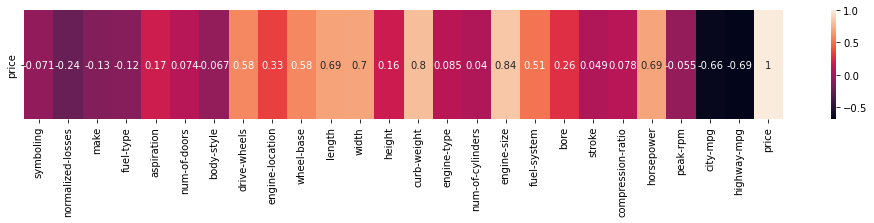

In [20]:
rcParams ['figure.figsize'] = 17, 2
sns.heatmap (corr_T, annot=True)
plt.show ()

# Data split

In [21]:
x = dataset.drop (['price'], axis=1).values
print (x)
print (x.shape)

[[ 3.0e+00  0.0e+00  0.0e+00 ...  5.0e+03  2.1e+01  2.7e+01]
 [ 3.0e+00  0.0e+00  0.0e+00 ...  5.0e+03  2.1e+01  2.7e+01]
 [ 1.0e+00  0.0e+00  0.0e+00 ...  5.0e+03  1.9e+01  2.6e+01]
 ...
 [-1.0e+00  9.5e+01  2.1e+01 ...  5.5e+03  1.8e+01  2.3e+01]
 [-1.0e+00  9.5e+01  2.1e+01 ...  4.8e+03  2.6e+01  2.7e+01]
 [-1.0e+00  9.5e+01  2.1e+01 ...  5.4e+03  1.9e+01  2.5e+01]]
(205, 25)


In [22]:
y = dataset ['price'].values
print (y)
print (y.shape)

[13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875.     0.
 16430. 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.
  6575.  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.
  6479.  6855.  5399.  6529.  7129.  7295.  7295.  7895.  9095.  8845.
 10295. 12945. 10345.  6785.     0.     0. 11048. 32250. 35550. 36000.
  5195.  6095.  6795.  6695.  7395. 10945. 11845. 13645. 15645.  8845.
  8495. 10595. 10245. 10795. 11245. 18280. 18344. 25552. 28248. 28176.
 31600. 34184. 35056. 40960. 45400. 16503.  5389.  6189.  6669.  7689.
  9959.  8499. 12629. 14869. 14489.  6989.  8189.  9279.  9279.  5499.
  7099.  6649.  6849.  7349.  7299.  7799.  7499.  7999.  8249.  8949.
  9549. 13499. 14399. 13499. 17199. 19699. 18399. 11900. 13200. 12440.
 13860. 15580. 16900. 16695. 17075. 16630. 17950. 18150.  5572.  7957.
  6229.  6692.  7609.  8921. 12764. 22018. 32528. 34028. 37028.     0.
  9295.  9895. 11850. 12170. 15040. 15510. 18150. 18620.  5118.  7053.
  7603

In [23]:
X_scaled = (x - x.mean(axis=0)) / x.std(axis=0)
print (X_scaled)

[[ 1.74347043 -1.67871386 -1.94825569 ... -0.10876019 -0.64655303
  -0.54605874]
 [ 1.74347043 -1.67871386 -1.94825569 ... -0.10876019 -0.64655303
  -0.54605874]
 [ 0.133509   -1.67871386 -1.94825569 ... -0.10876019 -0.95301169
  -0.69162706]
 ...
 [-1.47645244 -0.04471984  1.40664061 ...  0.61278798 -1.10624102
  -1.12833203]
 [-1.47645244 -0.04471984  1.40664061 ... -0.39737946  0.11959362
  -0.54605874]
 [-1.47645244 -0.04471984  1.40664061 ...  0.46847835 -0.95301169
  -0.83719538]]


In [24]:
pd.DataFrame (X_scaled).isnull ().sum ().sum ()

0

# PCA

In [25]:
# Create principal components
X_pca = PCA().fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.748318,3.322873,-2.967462,0.461749,-0.539364,0.764626,-0.694176,-1.362918,-2.917051,-1.019182,...,-0.485594,1.720928,0.722115,-0.142604,-0.131064,0.323408,0.195486,-0.325130,-0.092737,0.006251
1,-0.748318,3.322873,-2.967462,0.461749,-0.539364,0.764626,-0.694176,-1.362918,-2.917051,-1.019182,...,-0.485594,1.720928,0.722115,-0.142604,-0.131064,0.323408,0.195486,-0.325130,-0.092737,0.006251
2,0.777133,2.807362,0.153596,0.590205,1.075565,2.382239,0.244207,-0.060059,-0.818875,0.524739,...,-0.739465,-0.017052,-0.499974,0.669238,-0.537545,0.274928,-0.070765,0.437199,0.166295,0.079580
3,-0.189845,0.267497,0.375915,-0.753897,-1.218588,0.724663,-0.405668,0.401286,0.341785,-0.119124,...,-0.168450,-0.163847,0.317129,-0.231953,-0.129968,-0.127608,-0.345834,0.038469,0.189074,0.222441
4,0.707679,0.549498,0.022060,-1.848876,-1.247668,1.134658,0.523917,1.456939,0.840814,-0.752547,...,0.409675,0.703215,0.035257,0.196753,0.521229,-0.233419,0.060079,0.212548,0.193015,-0.004987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3.002898,-0.871296,0.996378,-0.818038,0.124723,-1.203139,-0.534734,-0.897465,0.669040,-0.166541,...,0.330147,-0.457132,0.045107,-0.611031,-0.242949,-0.243308,0.128289,-0.032833,-0.032902,0.061497
201,3.980770,-0.460295,0.687299,-0.417633,-0.638046,-1.472273,-0.024309,0.981611,0.185752,0.541724,...,-0.059915,-0.638577,0.317159,-0.203712,-0.179930,-0.042897,-0.271963,0.169370,-0.043975,0.119551
202,3.576909,0.470153,2.372506,-0.379207,0.925446,-0.780125,0.113238,-0.487029,1.341563,0.486128,...,-0.226603,-0.332264,-0.102201,-0.778706,-0.218282,-0.397666,-0.116831,-0.210500,-0.159841,-0.059907
203,3.312359,-2.917025,0.994371,4.169584,-0.294488,-0.710356,-0.457637,0.538547,0.067282,0.777986,...,-0.032803,-0.296439,-0.762296,-0.259133,-0.204467,-0.181912,0.043499,-0.193939,0.211317,0.169715


In [26]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [27]:
def pca_results(full_dataset, pca, cols):
    # Dimension indexing
    dimensions = dimensions = \
    ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = cols)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions    

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [28]:
print('Number of Components :   Variance Explained')
for component_count in range(1,11):
    pca, X_pca = do_pca(component_count, X_scaled)
    results = pca_results(X_scaled, pca, component_names)
    print('{:20} :   {:2.1%}'.format(component_count, results['Explained Variance'].sum()))

Number of Components :   Variance Explained
                   1 :   29.7%
                   2 :   46.4%
                   3 :   55.4%
                   4 :   63.7%
                   5 :   69.0%
                   6 :   73.6%
                   7 :   77.9%
                   8 :   81.8%
                   9 :   85.1%
                  10 :   87.6%


### Conclusion: We can also used just three columns and still it will be able to explain more than 80% variance